In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools
from scipy.spatial import distance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
dataset = pd.read_csv("titanic.csv")
avg_age = np.mean(dataset['Age'])
#print(avg_age)
dataset['Age'] = dataset['Age'].fillna(avg_age)
dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,C80,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,B29,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,D10,S
...,...,...,...,...,...,...,...,...,...,...
226,874,0,3,male,47.0,0,0,9.0000,B53,S
227,877,0,3,male,20.0,0,0,9.8458,B55,S
228,880,1,1,female,56.0,0,1,83.1583,C50,C
229,888,1,1,female,19.0,0,0,30.0000,B42,S


In [3]:
length_df = len(dataset)
#print(length_df)
train_last_index = (length_df * 60) // 100
#print(train_last_index)

train_data = dataset[0:train_last_index]
test_data = dataset[train_last_index:length_df]
#test_data

In [4]:
#Preparing Training List
train_list = train_data.values
train_list_str = train_list[:,8]
train_list_str = train_list_str.tolist()
train_list_age = train_list[:,4]
train_list_age = train_list_age.tolist()
train_list_age = np.array(train_list_age)
train_list_age = train_list_age.astype(int)
train_list_age = train_list_age.tolist()
train_list = train_list.tolist()

#print(train_list_age)
# print(train_list_str)
#print(train_list_str)
#print(train_list)
for j in train_list:
    del j[0]
    #print(train_list)
    del j[3]
    #print(train_list)
    del j[5]
    #print(train_list)
    del j[5]
    #print(train_list)
    if j[2] == "male":
        j[2] = 0
    else:
        j[2] = 1
    if j[5] == 'S':
        j[5] = 0
    elif j[5] == 'Q':
        j[5] = 1
    else:
        j[5] = 2

#print(train_list)

In [5]:
#Preparing Test List
test_list = test_data.values
test_list_str = test_list[:,8]
test_list_str = test_list_str.tolist()
test_list_age = test_list[:,4]
test_list_age = test_list_age.tolist()
test_list = test_list.tolist()
test_list_age = np.array(test_list_age)
test_list_age = test_list_age.astype(int)
test_list_age = test_list_age.tolist()
#print(test_list_age)
#print(len(test_list_str))
for j in test_list:
    del j[0]
    del j[3]
    del j[5]
    del j[5]
    if j[2] == "male":
        j[2] = 0
    else:
        j[2] = 1
    if j[5] == 'S':
        j[5] = 0
    elif j[5] == 'Q':
        j[5] = 1
    else:
        j[5] = 2
    
#print(test_list)

In [6]:
# Euclidean distance
def euclidean(p,q):
    dis = 0
    i = 1
    while i <= 5:
        dis += ((q[i] - p[i])**2)
        i = i + 1
    dis = math.sqrt(dis)
    return dis

In [7]:
# Hamming Distance
def hamming(p,q):
    dis = 0
    i = 0
    while(i < len(p) and i < len(q)):
        if(p[i] != q[i]):
            dis += 1
        i += 1
    return dis

In [8]:
# Hamming Distance (Integers/Floats)
def hammFl(p,q):
    dis = 0
    for i in range(31,-1,-1):
        b1 = p >> i&1
        b2 = q >> i&1
        dis += not(b1==b2)
    return dis

In [9]:
#Calculating Distance
all_dis = []
for (p,x,a) in itertools.zip_longest(test_list,test_list_str,test_list_age):
    q_dis = []
    for (q,y,b) in itertools.zip_longest(train_list,train_list_str,train_list_age):
        dis_class = []
        dis = (euclidean(p,q) + distance.hamming(x,y) + hammFl(a,b))
        dis = round(dis,3)
        dis_class.append(dis)
        dis_class.append(q[0])
        #print(dis_class)
        q_dis.append(dis_class)
        #print(q_dis)
    all_dis.append(q_dis)
#print(all_dis)
print(len(all_dis[0]))
arr = np.array(all_dis)
print(arr.shape)

138
(93, 138, 2)


In [18]:
# KNN Function
def KNN(q, k):
    q = sorted(q,key = lambda x:x[0])
    #print(q)
    survived = 0
    unsurvived = 0
    if k == 1:
        return q[0][1]
    for i in range(k):
        #print(q[i][1])
        if q[i][1] == 1:
            survived += 1
        else:
            unsurvived += 1
    if survived >= unsurvived:
        return 1
    else:
        return 0
#print(all_dis)

#print(arr)

            

In [19]:
# Applying KNN
# print(all_dis)
output_arr = []
k = 1
while k <= 30:
    output = []
    for a in range(len(test_list)):
        #print(all_dis[a])
        val = KNN(all_dis[a], k)
        output.append(val)
    output_arr.append(output)
    k = k + 1
# print(len(output))
# print((output_arr))
# print(output_arr[0])
# print(output_arr[1])
# print(output_arr)

In [30]:
accuracy_list = []
index = 0
while index <= len(output_arr)-1:
    count = 0
    array = output_arr[index]
    #print(array,"->",test_list)
    #print(array)
    for i in range(30):
        #print(test_list[i][0])
        if array[i] == test_list[i][0]:
            count = count + 1
    acc = (count / 30)*100
    index = index + 1
    #print(count,"-->",acc)
    accuracy_list.append(acc)
print(accuracy_list)
test_output = np.array(test_list)
test_output = test_output[:,0]
test_output = test_output.tolist();
# confusion_matrix(test_output,array)
# print(test_output)
# print(array)

[70.0, 86.66666666666667, 83.33333333333334, 83.33333333333334, 80.0, 83.33333333333334, 80.0, 80.0, 80.0, 83.33333333333334, 80.0, 86.66666666666667, 80.0, 83.33333333333334, 80.0, 83.33333333333334, 83.33333333333334, 83.33333333333334, 80.0, 80.0, 80.0, 86.66666666666667, 76.66666666666667, 83.33333333333334, 76.66666666666667, 80.0, 83.33333333333334, 80.0, 73.33333333333333, 76.66666666666667]


||  Maximum accuracy:  86.67 %  for K =  2   ||


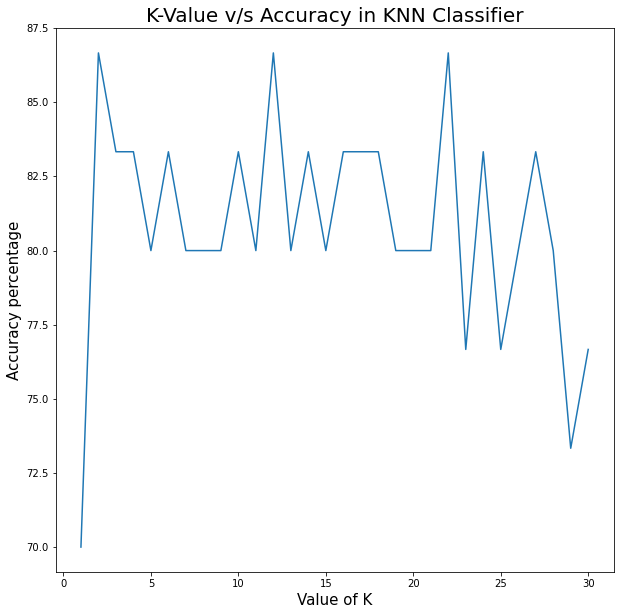

In [21]:
x_axis = list(range(1,31))
y_axis = accuracy_list
maximum = max(accuracy_list)
location_of_max = accuracy_list.index(maximum)
print("================================================")
print("||  Maximum accuracy: ", round(maximum,2), "%", " for K = ",location_of_max+1, "  ||")
print("================================================")

plt.figure(figsize=(10,10))
plt.xlabel("Value of K",fontsize="15")
plt.ylabel("Accuracy percentage",fontsize="15")
plt.title("K-Value v/s Accuracy in KNN Classifier",fontsize="20")
plt.plot(x_axis, y_axis)
plt.show()

In [22]:
for i in range(len(output_arr)):
    print("=================")
    print("For K = ", i + 1)
    print(confusion_matrix(output_arr[i],test_output))
    print("F1 score: ",round(f1_score(test_output,output_arr[i]),2))
    print("Recall score: ",round(recall_score(output_arr[i],test_output),2))
    print("Precision score: ",round(precision_score(output_arr[i],test_output),2))
    print("=================")
    print()

For K =  1
[[16 26]
 [11 40]]
F1 score:  0.68
Recall score:  0.78
Precision score:  0.61

For K =  2
[[ 7  9]
 [20 57]]
F1 score:  0.8
Recall score:  0.74
Precision score:  0.86

For K =  3
[[18 16]
 [ 9 50]]
F1 score:  0.8
Recall score:  0.85
Precision score:  0.76

For K =  4
[[ 9  7]
 [18 59]]
F1 score:  0.83
Recall score:  0.77
Precision score:  0.89

For K =  5
[[11 15]
 [16 51]]
F1 score:  0.77
Recall score:  0.76
Precision score:  0.77

For K =  6
[[ 6  9]
 [21 57]]
F1 score:  0.79
Recall score:  0.73
Precision score:  0.86

For K =  7
[[12 14]
 [15 52]]
F1 score:  0.78
Recall score:  0.78
Precision score:  0.79

For K =  8
[[ 7  7]
 [20 59]]
F1 score:  0.81
Recall score:  0.75
Precision score:  0.89

For K =  9
[[10 11]
 [17 55]]
F1 score:  0.8
Recall score:  0.76
Precision score:  0.83

For K =  10
[[ 8  6]
 [19 60]]
F1 score:  0.83
Recall score:  0.76
Precision score:  0.91

For K =  11
[[11  9]
 [16 57]]
F1 score:  0.82
Recall score:  0.78
Precision score:  0.86

For K =  12